In [ ]:
import numpy as np
import random
import cv2
import matplotlib.pyplot as plt

In [ ]:
def noise(image,prob):
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

In [ ]:
img_bw = cv2.imread('img.jpg',0)
print('Original Matrix Shape:',img_bw.shape)
print('Original Matrix Size:',img_bw.size)
M = img_bw.shape[0]
N = img_bw.shape[1]
img_matrix=np.matrix(img_bw)
print(img_matrix)


Original Matrix Shape: (1000, 2000)
Original Matrix Size: 2000000
[[ 33   0   0 ... 189 189 189]
 [ 17   1   4 ... 189 189 189]
 [  3  14  24 ... 189 189 189]
 ...
 [  0   0   0 ...   0  10   6]
 [  0   0   0 ...   9   3   0]
 [  0   0   0 ...  21   0  13]]


In [ ]:
noise_img = noise(img_bw,0.05)
cv2.imwrite('noise.jpg', noise_img)
img_noise = cv2.imread('noise.jpg',0)
print('Noise Matrix Shape:',img_noise.shape)
print('Noise Matrix Size:',img_noise.size)
R = img_noise.shape[0]
D = img_noise.shape[1]
noise_matrix=np.matrix(img_noise)
print(noise_matrix)

Noise Matrix Shape: (1000, 2000)
Noise Matrix Size: 2000000
[[  1   0   0 ... 187 189 191]
 [ 18   3   6 ... 191   0 185]
 [  0  15  23 ... 190 189 192]
 ...
 [  2   0   0 ...   0  13   4]
 [  0   3   3 ...  11   1   0]
 [  1   0   0 ...  19   1 255]]


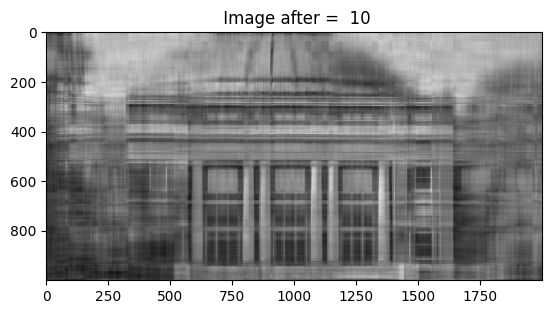

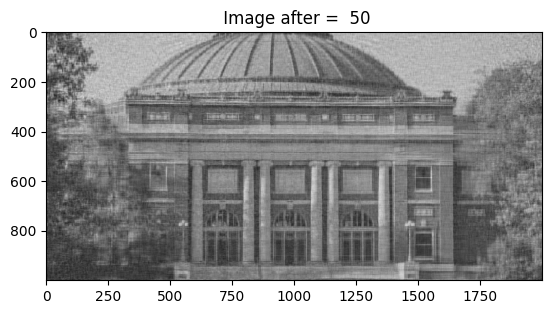

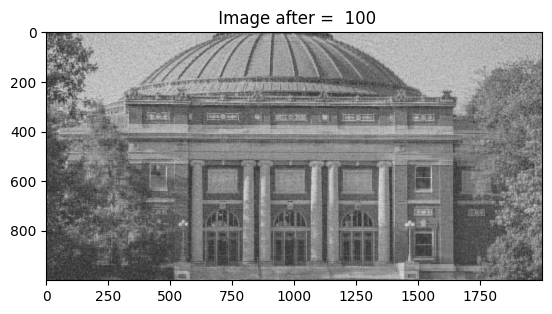

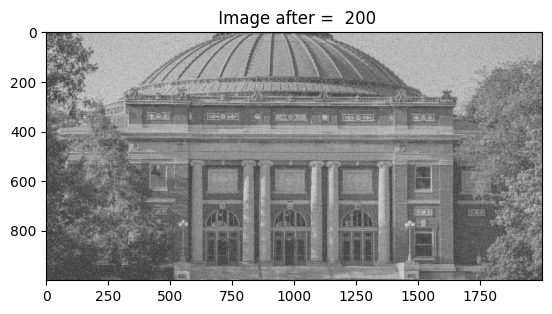

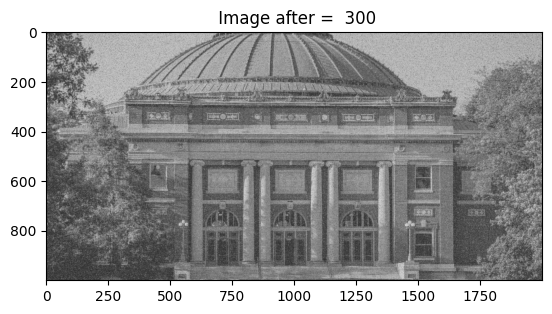

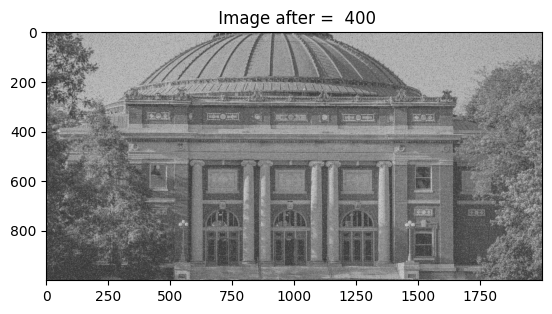

In [ ]:
U, sigma, V = np.linalg.svd(noise_matrix)
n=range(10,400)
for k in (10,50,100,200,300,400):
    z= np.matrix(U[:, :k]) * np.diag(sigma[:k]) * np.matrix(V[:k, :])
    plt.imshow(z, cmap = 'gray')
    title = " Image after =  %s" %k
    plt.title(title)
    plt.show()


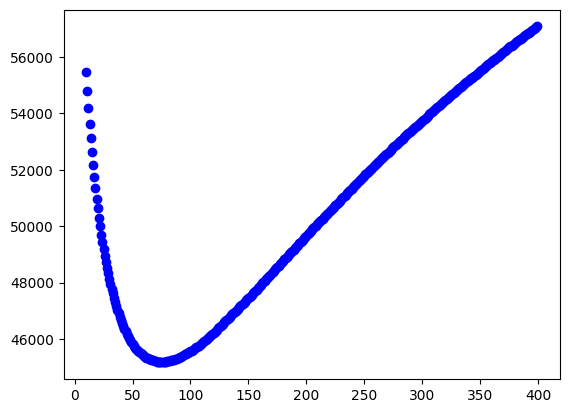

In [ ]:
p=[]
for k in n:
    z = np.matrix(U[:, :k]) * np.diag(sigma[:k]) * np.matrix(V[:k, :])
    p.append(np.linalg.norm(img_matrix - z))

plt.scatter(n,p, color ="blue")
plt.show()

# U, sigma, V = np.linalg.svd(noise_matrix)

# z80= np.matrix(U[:, :80]) * np.diag(sigma[:80]) * np.matrix(V[:80, :])
# print('Matrix k=80 is:',z80)
# p80=np.linalg.norm(img_matrix - z80)
# print('Norm Ferobinious k=80 is:',p80)
